In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
from scipy import signal

In [2]:
data_folder = "../../data/william/"

In [3]:
fig_folder = "../../fig/william/"

In [4]:
f_name = f'{data_folder}/preprocessed_data.csv'

In [5]:
data = pd.read_csv(f_name, index_col=0)
data

,label,0,1,2,3,4,5,6,7,8,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,sitting,-0.416300,-0.417491,-0.420441,-0.429083,-0.420441,-0.414827,-0.414827,-0.425872,-0.434747,...,0.549077,0.555241,0.555241,0.539026,0.500123,0.539026,0.543436,0.543436,0.543436,0.541752
1,sitting,-0.975244,-0.975244,-0.975244,-0.956182,-0.958875,-0.958875,-0.958875,-0.939893,-0.934297,...,1.424881,1.448575,1.448575,1.456614,1.460817,1.460817,1.464875,1.485612,1.485612,1.419242
2,sitting,-0.075665,-0.075665,-0.031610,-0.031610,-0.044277,-0.054205,-0.054205,-0.038245,-0.038245,...,-0.450913,-0.458894,-0.458894,-0.437464,-0.429559,-0.429559,-0.465102,-0.465102,-0.437855,-0.390392
3,sitting,-1.344867,-1.358563,-1.358563,-1.358563,-1.360337,-1.360337,-1.400246,-1.406819,-1.400246,...,1.714682,1.714682,1.714712,1.742487,1.742487,1.713822,1.713822,1.737701,1.737701,1.730101
4,sitting,-0.972655,-1.007781,-1.018223,-1.018223,-1.061634,-1.061634,-1.059564,-1.026008,-1.026008,...,1.947539,1.947539,1.947539,1.883424,1.903985,1.903985,1.903985,1.918113,1.909350,1.909350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,standing,0.362166,0.462288,0.467350,0.467350,0.441121,0.441121,0.441121,0.443292,0.443292,...,-0.600820,-0.605646,-0.622196,-0.622196,-0.637492,-0.597702,-0.637492,-0.597702,-0.642326,-0.506493
346,standing,-0.025810,-0.025810,-0.020282,-0.013312,-0.016767,-0.005698,-0.016767,0.022315,-0.003027,...,0.071983,0.046967,0.046967,0.055400,0.055400,0.060659,0.084731,0.098476,0.084731,-0.000364
347,standing,0.945325,0.952541,0.962438,0.962438,0.950656,0.927253,0.927253,0.976097,0.980584,...,-1.318418,-1.337065,-1.371594,-1.372040,-1.372942,-1.372040,-1.372942,-1.362027,-1.374201,-1.351678
348,standing,1.015584,1.015584,1.015823,1.027837,1.027837,1.011747,1.008753,1.011747,1.024149,...,-1.649722,-1.649722,-1.659491,-1.679571,-1.679571,-1.668293,-1.665690,-1.665690,-1.622155,-1.598536


In [10]:
def remove_axis_decorations(axes):

    for ax in axes.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

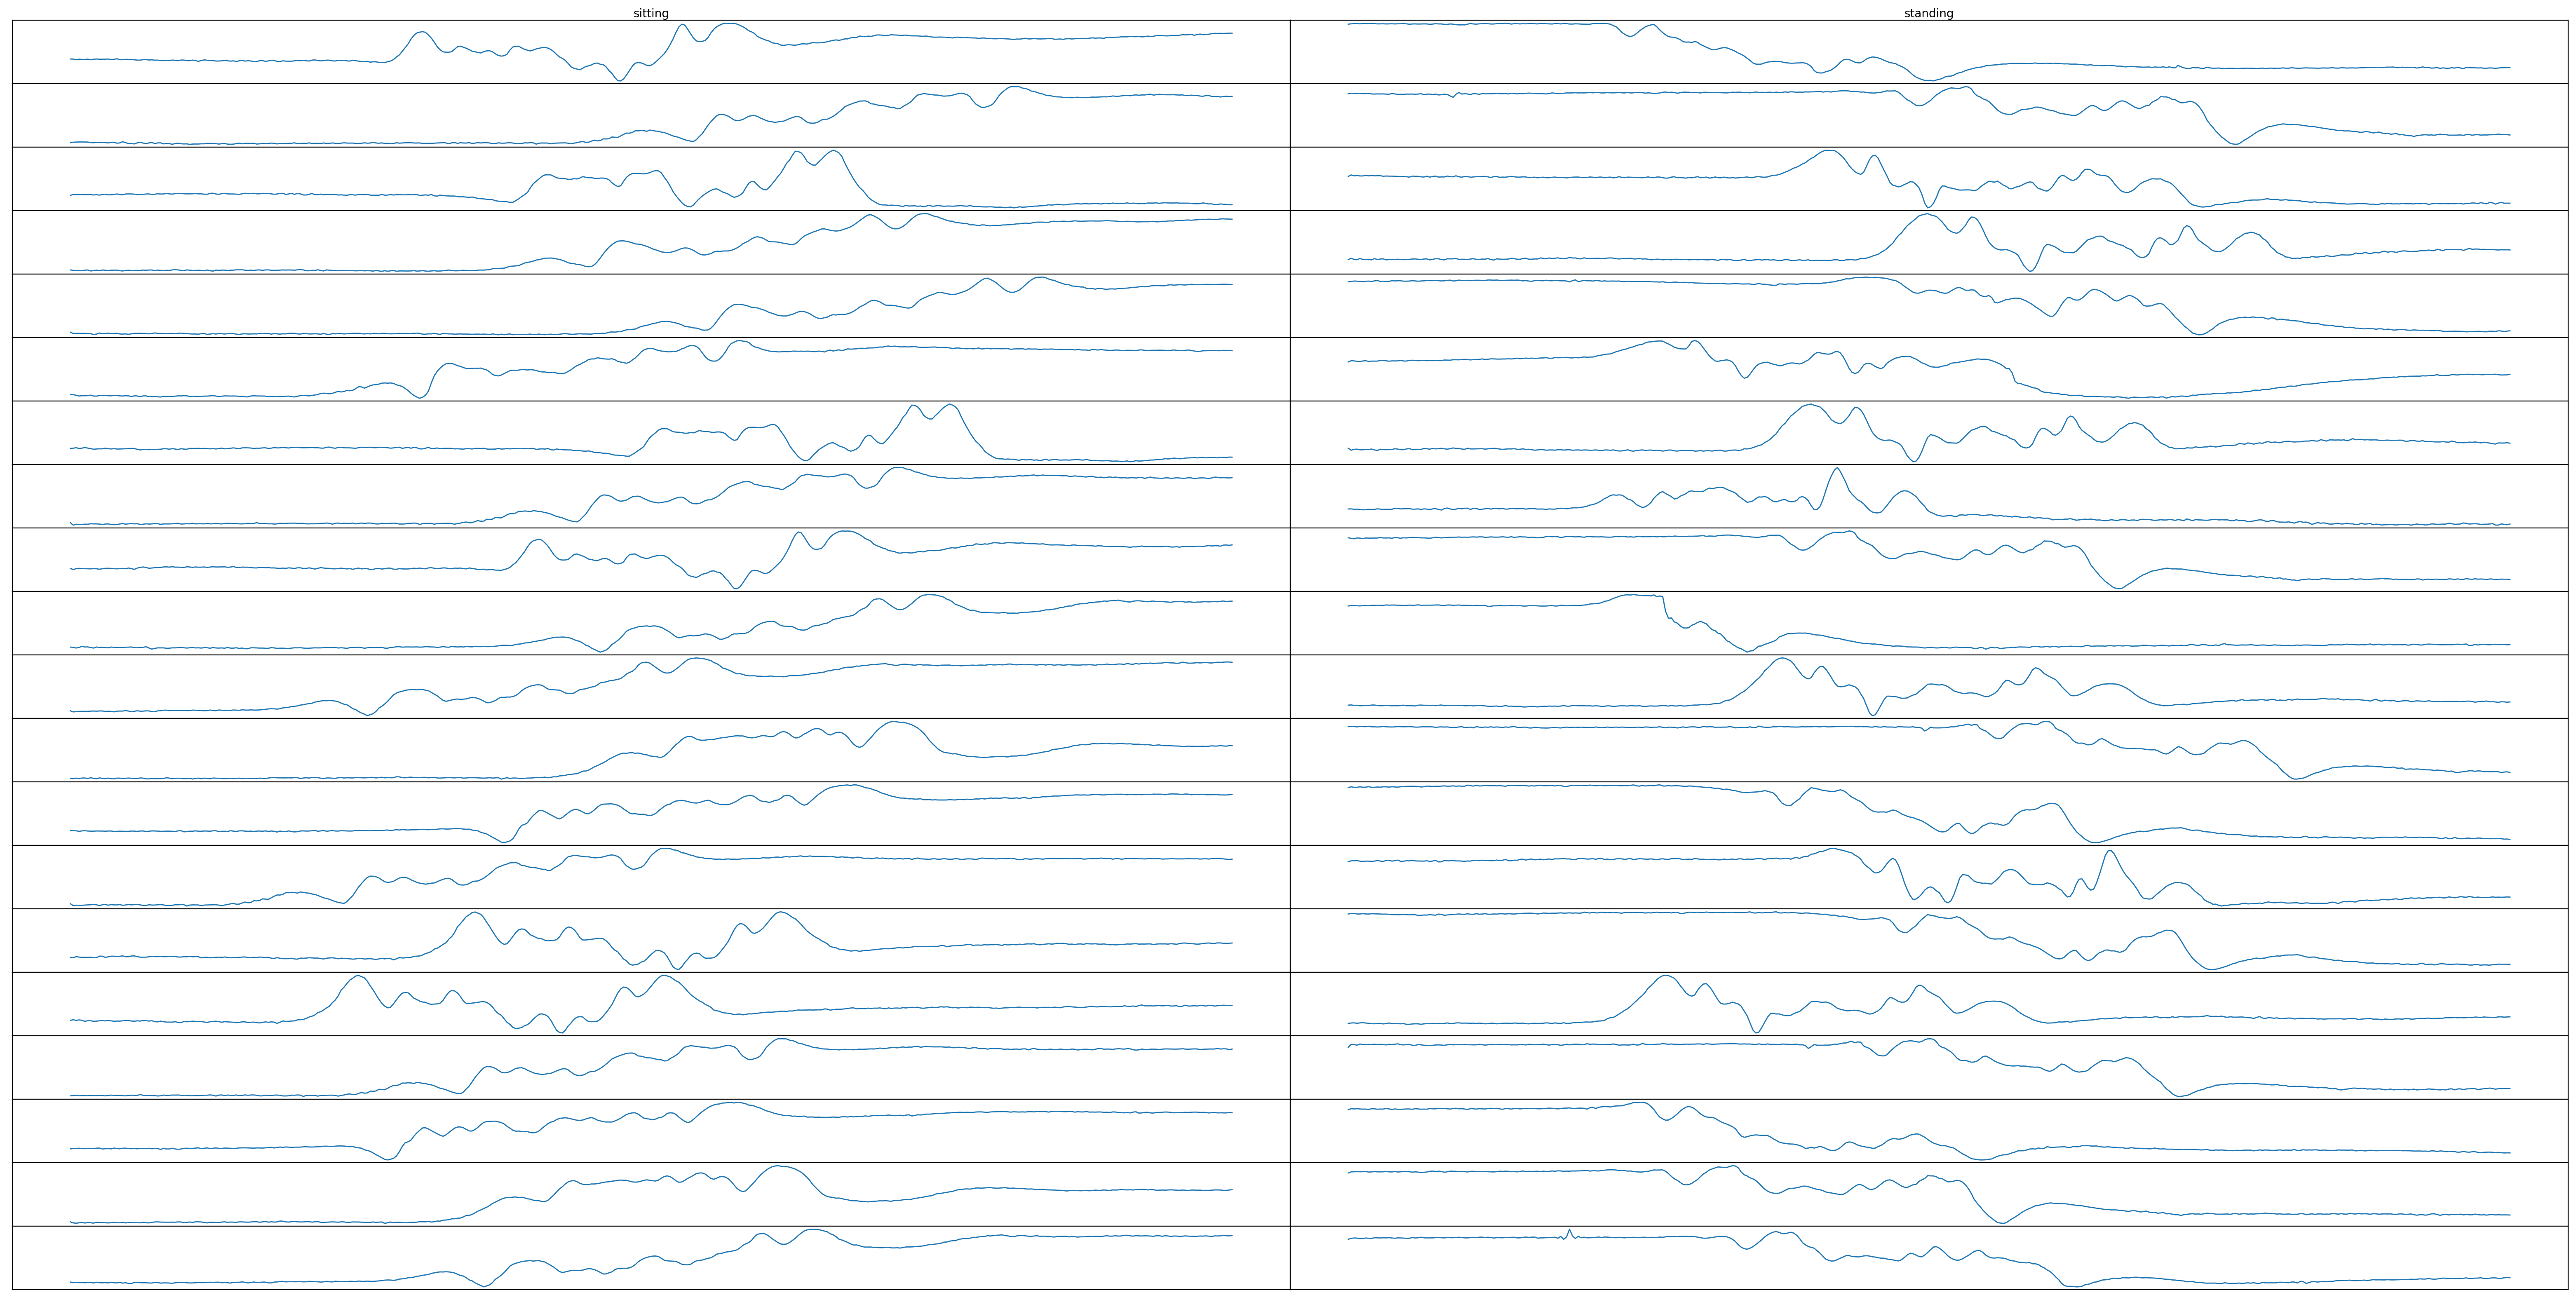

In [12]:
labels = list(data.label.unique())
n_trial_fig = 20

# Figure 1 -----------------------------------------

fig, axes = plt.subplots(
    figsize=(40, 20),
    nrows=n_trial_fig,
    ncols=len(labels))

remove_axis_decorations(axes)
fig.subplots_adjust(wspace=0, hspace=0)

for column, label in enumerate(labels):
    for i in range(n_trial_fig):

        ax = axes[i, column]

        x = data[data.label==label].iloc[i, 1:].values.astype(np.float64)
        x = signal.decimate(x, 5)

        ax.plot(x, lw=1.0)

    ax = axes[0, column]
    ax.text(0.5, 1.1, label,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
plt.savefig(f"{fig_folder}/mosaic.pdf", bbox_inches='tight')